In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df_all = pd.read_csv('figma_help_center_traffic.csv')

In [3]:
# Preview data
df_all.head()

,day,country,browser,sessions,sessions_with_cases
0,1,A,Chrome,216,10
1,1,A,Firefox,66,3
2,1,A,Safari,31,1
3,1,A,Edge,17,0
4,1,A,Arc,19,0


In [4]:
# Preview data
df_all.shape

(1050, 5)

### 1. Decompose the escalation rate per day into contributions of different countries.

In [5]:
# Aggregating by country and day
df = df_all.groupby(['day', 'country'], as_index=False).agg(
    sessions=('sessions', 'sum'),
    sessions_with_cases=('sessions_with_cases', 'sum')
)

In [6]:
print(df.head())
print(df.shape)

   day country  sessions  sessions_with_cases
0    1       A       349                   14
1    1       B      4591                  136
2    1       C      7415                  590
3    1       D       295                   28
4    1       E       335                    4
(210, 4)


In [7]:
# Define the escalation rate
df['escalation_rate'] = df['sessions_with_cases'] / df['sessions']

# Compute total sessions and total escalation rate per day
daily_totals = df.groupby('day').agg(
    total_sessions=('sessions', 'sum'),
    total_cases=('sessions_with_cases', 'sum')
).reset_index()

daily_totals['overall_escalation_rate'] = daily_totals['total_cases'] / daily_totals['total_sessions']

In [8]:
# Merge daily totals back to the dataset
df = df.merge(daily_totals, on= 'day')

In [9]:
print(df.head(10))

   day country  sessions  sessions_with_cases  escalation_rate  \
0    1       A       349                   14         0.040115   
1    1       B      4591                  136         0.029623   
2    1       C      7415                  590         0.079568   
3    1       D       295                   28         0.094915   
4    1       E       335                    4         0.011940   
5    1       F      2352                  279         0.118622   
6    1       G       556                  109         0.196043   
7    2       A       399                   18         0.045113   
8    2       B      4616                  136         0.029463   
9    2       C      7485                  596         0.079626   

   total_sessions  total_cases  overall_escalation_rate  
0           15893         1160                 0.072988  
1           15893         1160                 0.072988  
2           15893         1160                 0.072988  
3           15893         1160           

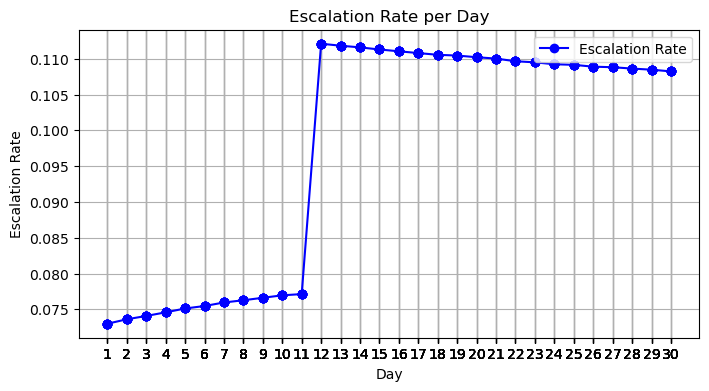

In [10]:
# Overall Escalation rate per day
plt.figure(figsize=(8, 4))
plt.plot(df['day'], df['overall_escalation_rate'], marker='o', linestyle='-', color='b', label='Escalation Rate')

plt.title('Escalation Rate per Day')
plt.xlabel('Day')
plt.ylabel('Escalation Rate')
plt.xticks(df['day']) 
plt.grid(True)
plt.legend()

plt.show()

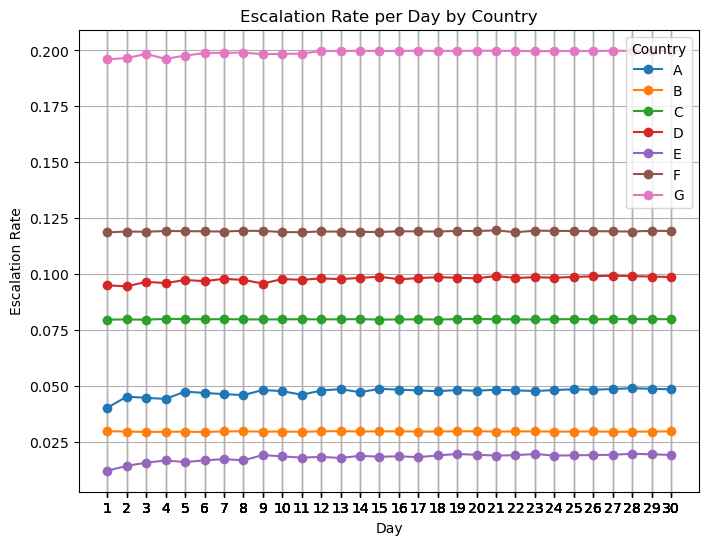

In [11]:
# For each country, plot escalation rate
countries = df['country'].unique()
plt.figure(figsize=(8, 6))

for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['day'], country_data['escalation_rate'], marker='o', linestyle='-', label=country)

plt.title('Escalation Rate per Day by Country')
plt.xlabel('Day')
plt.ylabel('Escalation Rate')
plt.xticks(df['day'])
plt.grid(True)
plt.legend(title='Country')

plt.show()

In [12]:
# Compute country proportion in total sessions
df['session_proportion'] = df['sessions'] / df['total_sessions']

In [13]:
# Testing: session proportion for all countries on a given day should sum to 1
df.groupby('day')['session_proportion'].sum().unique()

array([1.])

In [14]:
# Check session proportion sum for all days
proportion_sums = df.groupby('day')['session_proportion'].sum()
print(proportion_sums.unique())  
# 1.0 is expected

[1.]


In [15]:
# Sort data to ensure correct lag calculation
df = df.sort_values(['country', 'day'])

# Compute lagged values for decomposition
df['prev_escalation_rate'] = df.groupby('country')['escalation_rate'].shift(1)
df['prev_session_proportion'] = df.groupby('country')['session_proportion'].shift(1)

# Check if lagged values are correctly added
print(df.head(10)) 

    day country  sessions  sessions_with_cases  escalation_rate  \
0     1       A       349                   14         0.040115   
7     2       A       399                   18         0.045113   
14    3       A       449                   20         0.044543   
21    4       A       499                   22         0.044088   
28    5       A       549                   26         0.047359   
35    6       A       599                   28         0.046745   
42    7       A       649                   30         0.046225   
49    8       A       699                   32         0.045780   
56    9       A       749                   36         0.048064   
63   10       A       799                   38         0.047559   

    total_sessions  total_cases  overall_escalation_rate  session_proportion  \
0            15893         1160                 0.072988            0.021959   
7            16303         1200                 0.073606            0.024474   
14           16713    

In [16]:
# Drop the first day data they don't have previous day data
df = df.dropna()
df.head(10)

,day,country,sessions,sessions_with_cases,escalation_rate,total_sessions,total_cases,overall_escalation_rate,session_proportion,prev_escalation_rate,prev_session_proportion
7,2,A,399,18,0.045113,16303,1200,0.073606,0.024474,0.040115,0.021959
14,3,A,449,20,0.044543,16713,1238,0.074074,0.026865,0.045113,0.024474
21,4,A,499,22,0.044088,17123,1277,0.074578,0.029142,0.044543,0.026865
28,5,A,549,26,0.047359,17533,1317,0.075115,0.031312,0.044088,0.029142
35,6,A,599,28,0.046745,17943,1354,0.075461,0.033383,0.047359,0.031312
42,7,A,649,30,0.046225,18353,1394,0.075955,0.035362,0.046745,0.033383
49,8,A,699,32,0.045780,18763,1431,0.076267,0.037254,0.046225,0.035362
56,9,A,749,36,0.048064,19173,1469,0.076618,0.039065,0.045780,0.037254
63,10,A,799,38,0.047559,19583,1507,0.076955,0.040801,0.048064,0.039065
70,11,A,849,39,0.045936,19993,1542,0.077127,0.042465,0.047559,0.040801


In [17]:
df.shape

(203, 11)

In [18]:
# Apply Kitagawa-Oaxaca-Blinder decomposition
df.loc[:, 'rate_effect'] = (df['escalation_rate'] - df['prev_escalation_rate']) * df['prev_session_proportion']

df.loc[:, 'proportion_effect'] = (df['session_proportion'] - df['prev_session_proportion']) * df['prev_escalation_rate']

df.loc[:, 'total_change'] = df['rate_effect'] + df['proportion_effect']

In [19]:
df.head(10)

,day,country,sessions,sessions_with_cases,escalation_rate,total_sessions,total_cases,overall_escalation_rate,session_proportion,prev_escalation_rate,prev_session_proportion,rate_effect,proportion_effect,total_change
7,2,A,399,18,0.045113,16303,1200,0.073606,0.024474,0.040115,0.021959,0.000110,0.000101,0.000211
14,3,A,449,20,0.044543,16713,1238,0.074074,0.026865,0.045113,0.024474,-0.000014,0.000108,0.000094
21,4,A,499,22,0.044088,17123,1277,0.074578,0.029142,0.044543,0.026865,-0.000012,0.000101,0.000089
28,5,A,549,26,0.047359,17533,1317,0.075115,0.031312,0.044088,0.029142,0.000095,0.000096,0.000191
35,6,A,599,28,0.046745,17943,1354,0.075461,0.033383,0.047359,0.031312,-0.000019,0.000098,0.000079
42,7,A,649,30,0.046225,18353,1394,0.075955,0.035362,0.046745,0.033383,-0.000017,0.000092,0.000075
49,8,A,699,32,0.045780,18763,1431,0.076267,0.037254,0.046225,0.035362,-0.000016,0.000087,0.000072
56,9,A,749,36,0.048064,19173,1469,0.076618,0.039065,0.045780,0.037254,0.000085,0.000083,0.000168
63,10,A,799,38,0.047559,19583,1507,0.076955,0.040801,0.048064,0.039065,-0.000020,0.000083,0.000064
70,11,A,849,39,0.045936,19993,1542,0.077127,0.042465,0.047559,0.040801,-0.000066,0.000079,0.000013


In [20]:
# Export a csv file with all the data to double check the calculation in excel
# df.to_csv("escalation_rate_decomposition.csv", index=False)

In [21]:
# Select relevant columns for output
output_df = df[['day', 'country', 'rate_effect', 'proportion_effect', 'total_change']]
output_df.to_csv("escalation_rate_decomposition_country.csv", index=False)

In [22]:
print(output_df.head(10))

    day country  rate_effect  proportion_effect  total_change
7     2       A     0.000110           0.000101      0.000211
14    3       A    -0.000014           0.000108      0.000094
21    4       A    -0.000012           0.000101      0.000089
28    5       A     0.000095           0.000096      0.000191
35    6       A    -0.000019           0.000098      0.000079
42    7       A    -0.000017           0.000092      0.000075
49    8       A    -0.000016           0.000087      0.000072
56    9       A     0.000085           0.000083      0.000168
63   10       A    -0.000020           0.000083      0.000064
70   11       A    -0.000066           0.000079      0.000013


In [23]:
import seaborn as sns

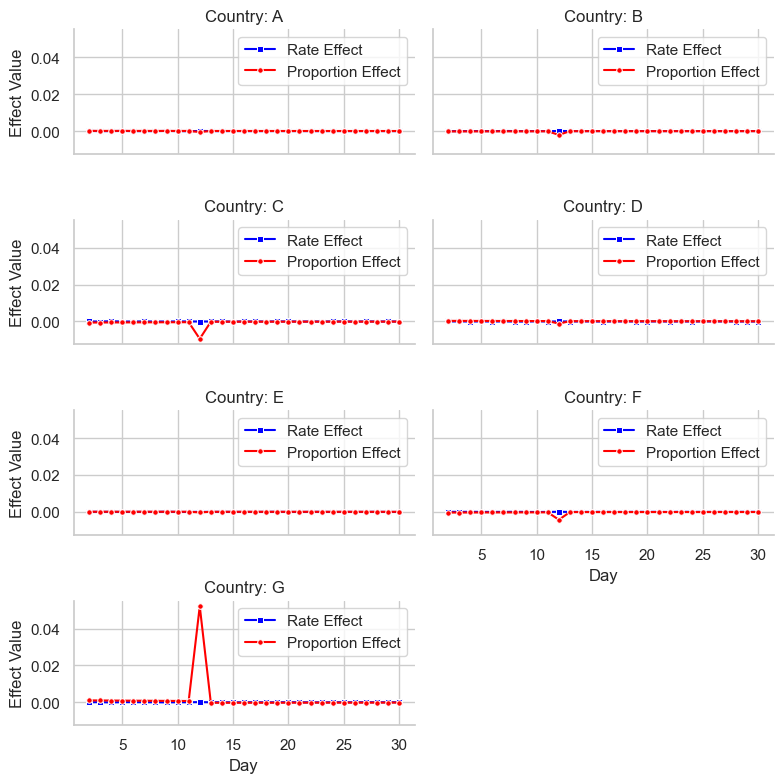

In [24]:
# Check the impact of rate_effect and proportion_effect for each country

# Create a FacetGrid with one plot per country
sns.set(style="whitegrid")
g = sns.FacetGrid(output_df, col="country", col_wrap=2, height=2, aspect=2, sharey=True)

# Map rate_effect and proportion_effect as separate lines
g.map_dataframe(sns.lineplot, x="day", y="rate_effect", marker="s", markersize=4, label="Rate Effect", color="blue")
g.map_dataframe(sns.lineplot, x="day", y="proportion_effect", marker="o", markersize=4, label="Proportion Effect", color="red")

g.set_axis_labels("Day", "Effect Value")
g.set_titles("Country: {col_name}")

for ax in g.axes.flat:
    ax.legend(["Rate Effect", "Proportion Effect"], loc="best") # Add a legend manually

plt.show()

 ### 2. Decompose the escalation rate per day into contributions of different countries and browser

In [25]:
# Define the escalation rate
df_all['escalation_rate'] = df_all['sessions_with_cases'] / df_all['sessions']

# Compute total sessions and total escalation rate per day
daily_totals = df_all.groupby('day').agg(
    total_sessions=('sessions', 'sum'),
    total_cases=('sessions_with_cases', 'sum')
).reset_index()

daily_totals['overall_escalation_rate'] = daily_totals['total_cases'] / daily_totals['total_sessions']

In [26]:
# Merge daily totals back to the dataset
df_all = df_all.merge(daily_totals, on= 'day')

In [27]:
df_all.head(10)

,day,country,browser,sessions,sessions_with_cases,escalation_rate,total_sessions,total_cases,overall_escalation_rate
0,1,A,Chrome,216,10,0.046296,15893,1160,0.072988
1,1,A,Firefox,66,3,0.045455,15893,1160,0.072988
2,1,A,Safari,31,1,0.032258,15893,1160,0.072988
3,1,A,Edge,17,0,0.000000,15893,1160,0.072988
4,1,A,Arc,19,0,0.000000,15893,1160,0.072988
5,1,B,Chrome,2792,83,0.029728,15893,1160,0.072988
6,1,B,Firefox,902,27,0.029933,15893,1160,0.072988
7,1,B,Safari,485,14,0.028866,15893,1160,0.072988
8,1,B,Edge,210,6,0.028571,15893,1160,0.072988
9,1,B,Arc,202,6,0.029703,15893,1160,0.072988


In [28]:
# Compute proportion in total sessions
df_all['session_proportion'] = df_all['sessions'] / df_all['total_sessions']

In [29]:
df_all.head(10)

,day,country,browser,sessions,sessions_with_cases,escalation_rate,total_sessions,total_cases,overall_escalation_rate,session_proportion
0,1,A,Chrome,216,10,0.046296,15893,1160,0.072988,0.013591
1,1,A,Firefox,66,3,0.045455,15893,1160,0.072988,0.004153
2,1,A,Safari,31,1,0.032258,15893,1160,0.072988,0.001951
3,1,A,Edge,17,0,0.000000,15893,1160,0.072988,0.001070
4,1,A,Arc,19,0,0.000000,15893,1160,0.072988,0.001195
5,1,B,Chrome,2792,83,0.029728,15893,1160,0.072988,0.175675
6,1,B,Firefox,902,27,0.029933,15893,1160,0.072988,0.056755
7,1,B,Safari,485,14,0.028866,15893,1160,0.072988,0.030517
8,1,B,Edge,210,6,0.028571,15893,1160,0.072988,0.013213
9,1,B,Arc,202,6,0.029703,15893,1160,0.072988,0.012710


In [30]:
# Sort data to ensure correct lag calculation
df_all = df_all.sort_values(['country', 'browser', 'day'])

# Compute lagged values for decomposition
df_all['prev_escalation_rate'] = df_all.groupby(['country','browser'])['escalation_rate'].shift(1)
df_all['prev_session_proportion'] = df_all.groupby(['country','browser'])['session_proportion'].shift(1)

# Check if lagged values are correctly added
print(df_all.head(10)) 

     day country browser  sessions  sessions_with_cases  escalation_rate  \
4      1       A     Arc        19                    0         0.000000   
39     2       A     Arc        17                    0         0.000000   
74     3       A     Arc        19                    0         0.000000   
109    4       A     Arc        19                    0         0.000000   
144    5       A     Arc        25                    1         0.040000   
179    6       A     Arc        31                    1         0.032258   
214    7       A     Arc        23                    1         0.043478   
249    8       A     Arc        46                    2         0.043478   
284    9       A     Arc        28                    1         0.035714   
319   10       A     Arc        49                    2         0.040816   

     total_sessions  total_cases  overall_escalation_rate  session_proportion  \
4             15893         1160                 0.072988            0.001195   
3

In [31]:
df_all= df_all.dropna()

# Apply Kitagawa-Oaxaca-Blinder decomposition
df_all.loc[:, 'rate_effect'] = (df_all['escalation_rate'] - df_all['prev_escalation_rate']) * df_all['prev_session_proportion']

df_all.loc[:, 'proportion_effect'] = (df_all['session_proportion'] - df_all['prev_session_proportion']) * df_all['prev_escalation_rate']

df_all.loc[:, 'total_change'] = df_all['rate_effect'] + df_all['proportion_effect']

In [32]:
df_all.head(15)

,day,country,browser,sessions,sessions_with_cases,escalation_rate,total_sessions,total_cases,overall_escalation_rate,session_proportion,prev_escalation_rate,prev_session_proportion,rate_effect,proportion_effect,total_change
39,2,A,Arc,17,0,0.000000,16303,1200,0.073606,0.001043,0.000000,0.001195,0.000000,-0.000000,0.000000e+00
74,3,A,Arc,19,0,0.000000,16713,1238,0.074074,0.001137,0.000000,0.001043,0.000000,0.000000,0.000000e+00
109,4,A,Arc,19,0,0.000000,17123,1277,0.074578,0.001110,0.000000,0.001137,0.000000,-0.000000,0.000000e+00
144,5,A,Arc,25,1,0.040000,17533,1317,0.075115,0.001426,0.000000,0.001110,0.000044,0.000000,4.438475e-05
179,6,A,Arc,31,1,0.032258,17943,1354,0.075461,0.001728,0.040000,0.001426,-0.000011,0.000012,1.033334e-06
214,7,A,Arc,23,1,0.043478,18353,1394,0.075955,0.001253,0.032258,0.001728,0.000019,-0.000015,4.078859e-06
249,8,A,Arc,46,2,0.043478,18763,1431,0.076267,0.002452,0.043478,0.001253,0.000000,0.000052,5.210576e-05
284,9,A,Arc,28,1,0.035714,19173,1469,0.076618,0.001460,0.043478,0.002452,-0.000019,-0.000043,-6.213210e-05
319,10,A,Arc,49,2,0.040816,19583,1507,0.076955,0.002502,0.035714,0.001460,0.000007,0.000037,4.465750e-05
354,11,A,Arc,35,1,0.028571,19993,1542,0.077127,0.001751,0.040816,0.002502,-0.000031,-0.000031,-6.131464e-05


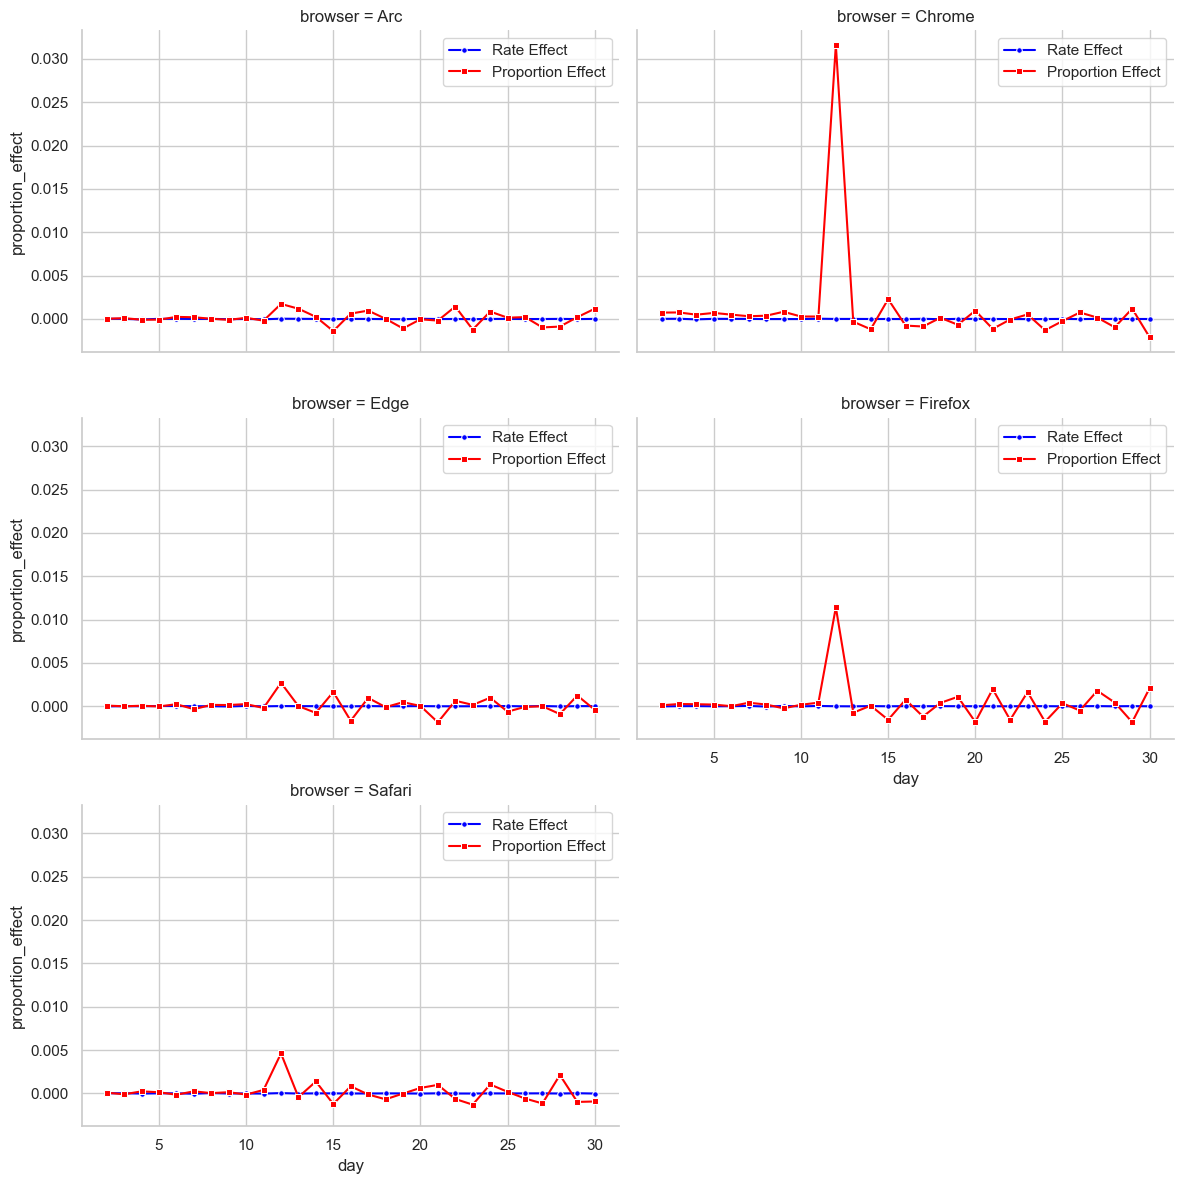

In [33]:
df_G = df_G = df_all[df_all['country'] == 'G']

# Create FacetGrid with one plot per browser
g = sns.FacetGrid(df_G, col='browser', col_wrap=2, height=4, aspect=1.5)

# Add line plots for rate_effect and proportion_effect
g.map_dataframe(sns.lineplot, x='day', y='rate_effect', marker='o', markersize=4, color='blue', label='Rate Effect')
g.map_dataframe(sns.lineplot, x='day', y='proportion_effect', marker='s', markersize=4, color='red', label='Proportion Effect')

for ax in g.axes.flat:
    ax.legend(["Rate Effect", "Proportion Effect"], loc="best") # Add a legend manually
    
# Adjust layout
plt.tight_layout()
plt.show()

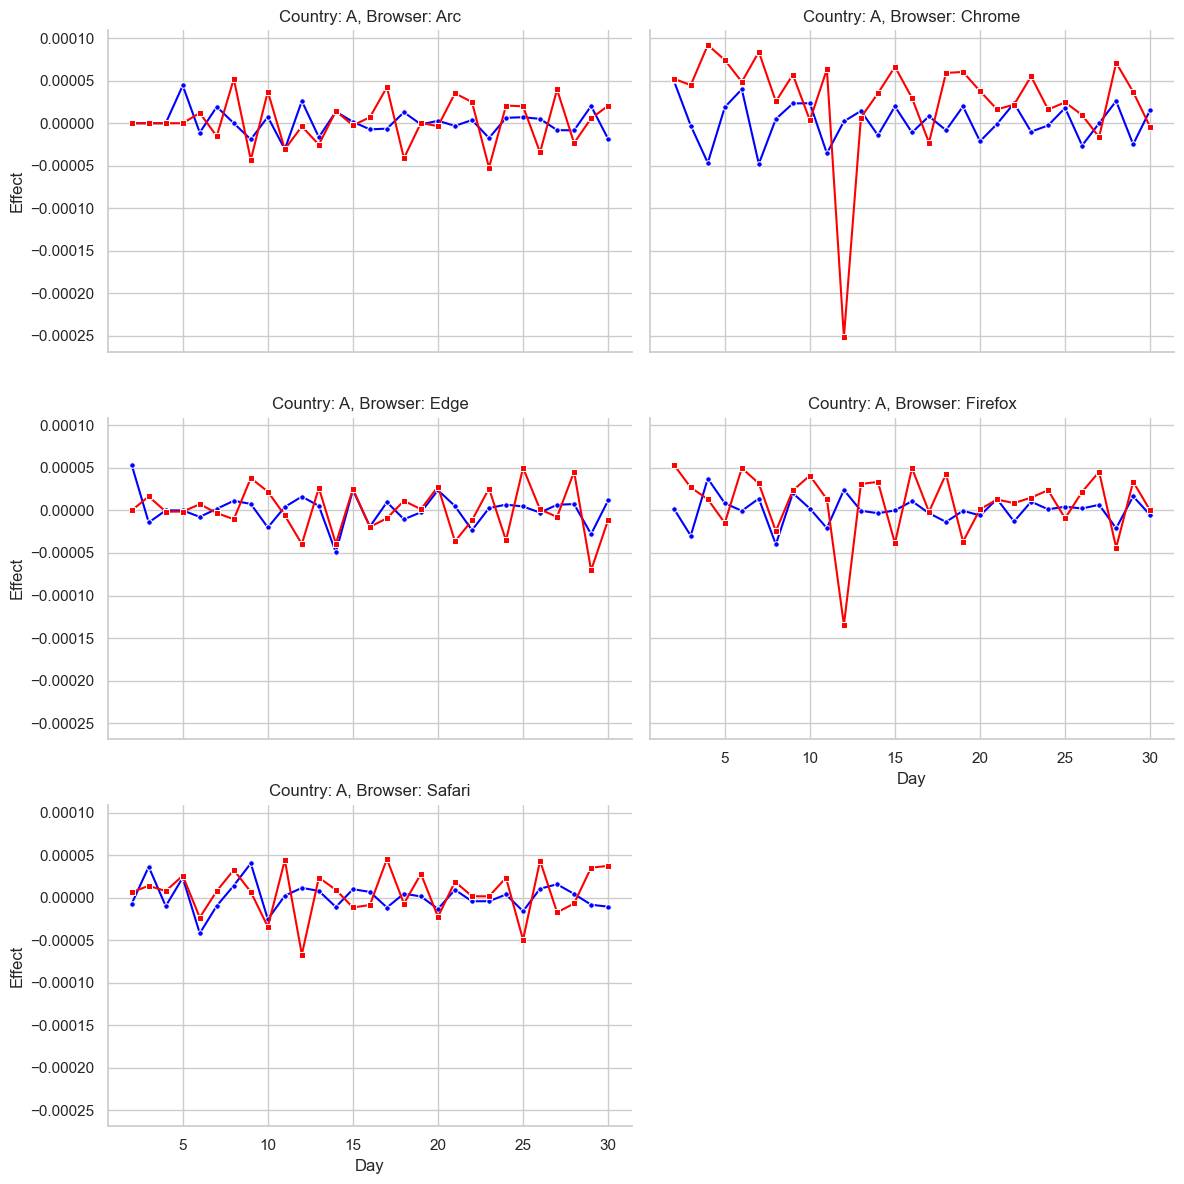

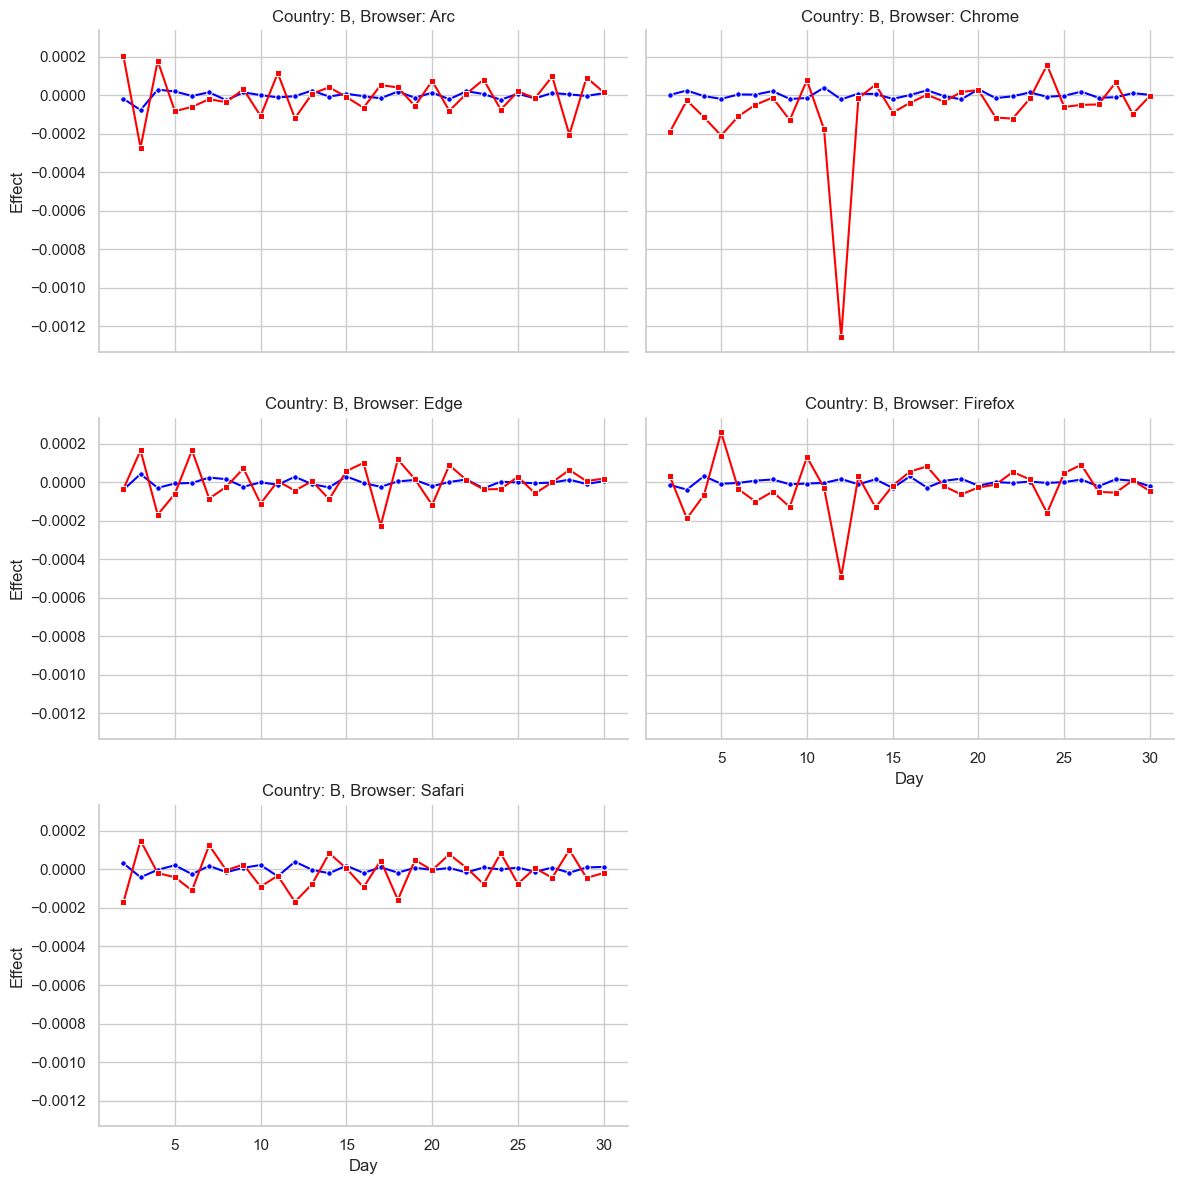

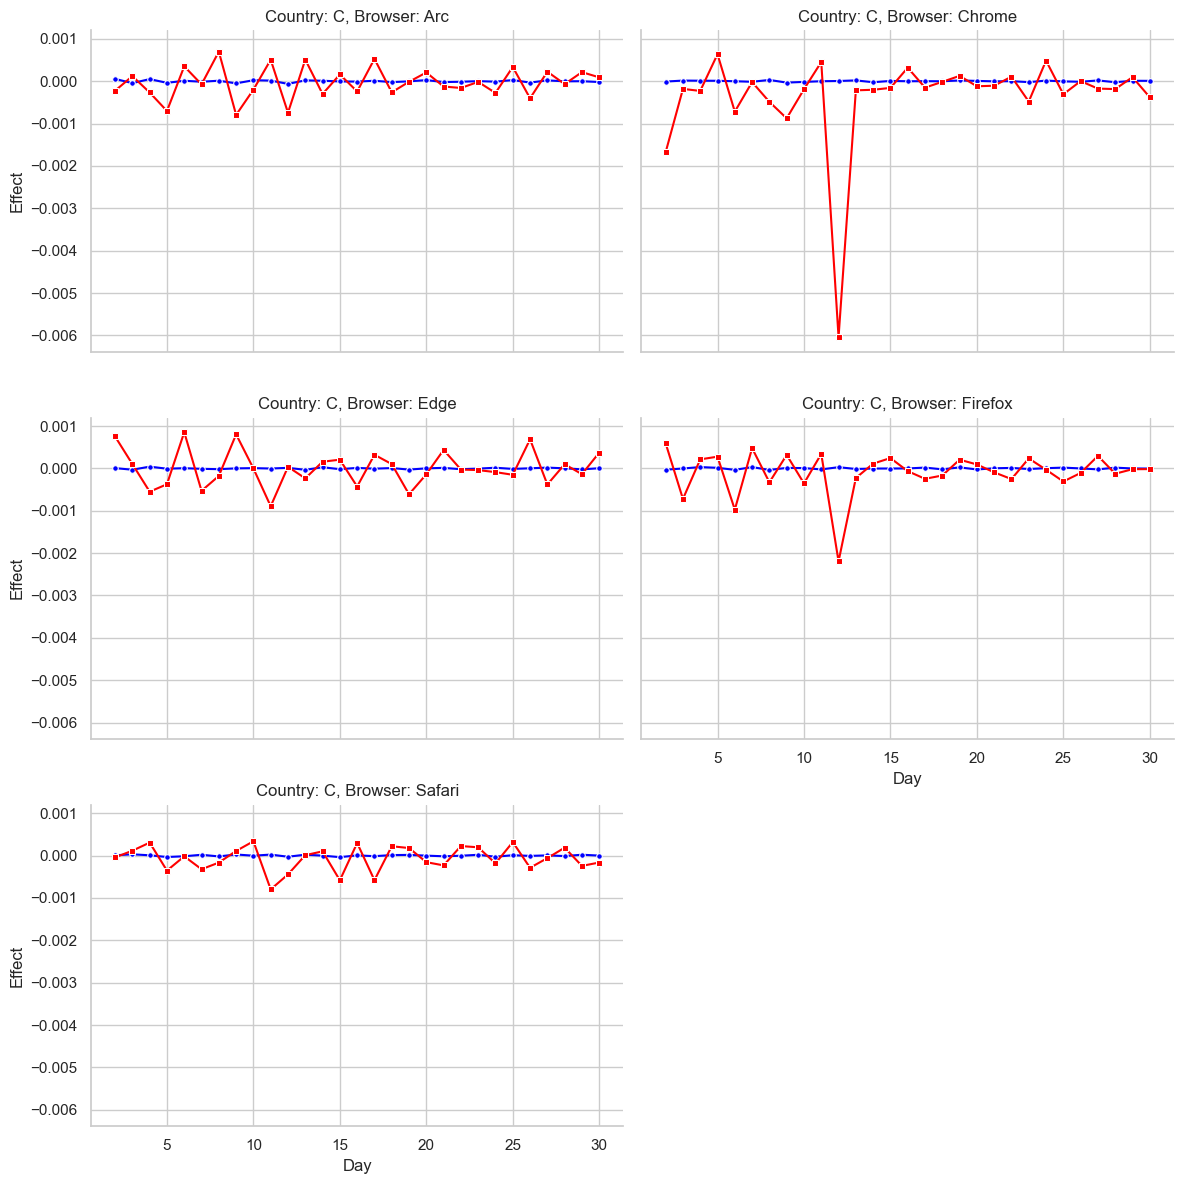

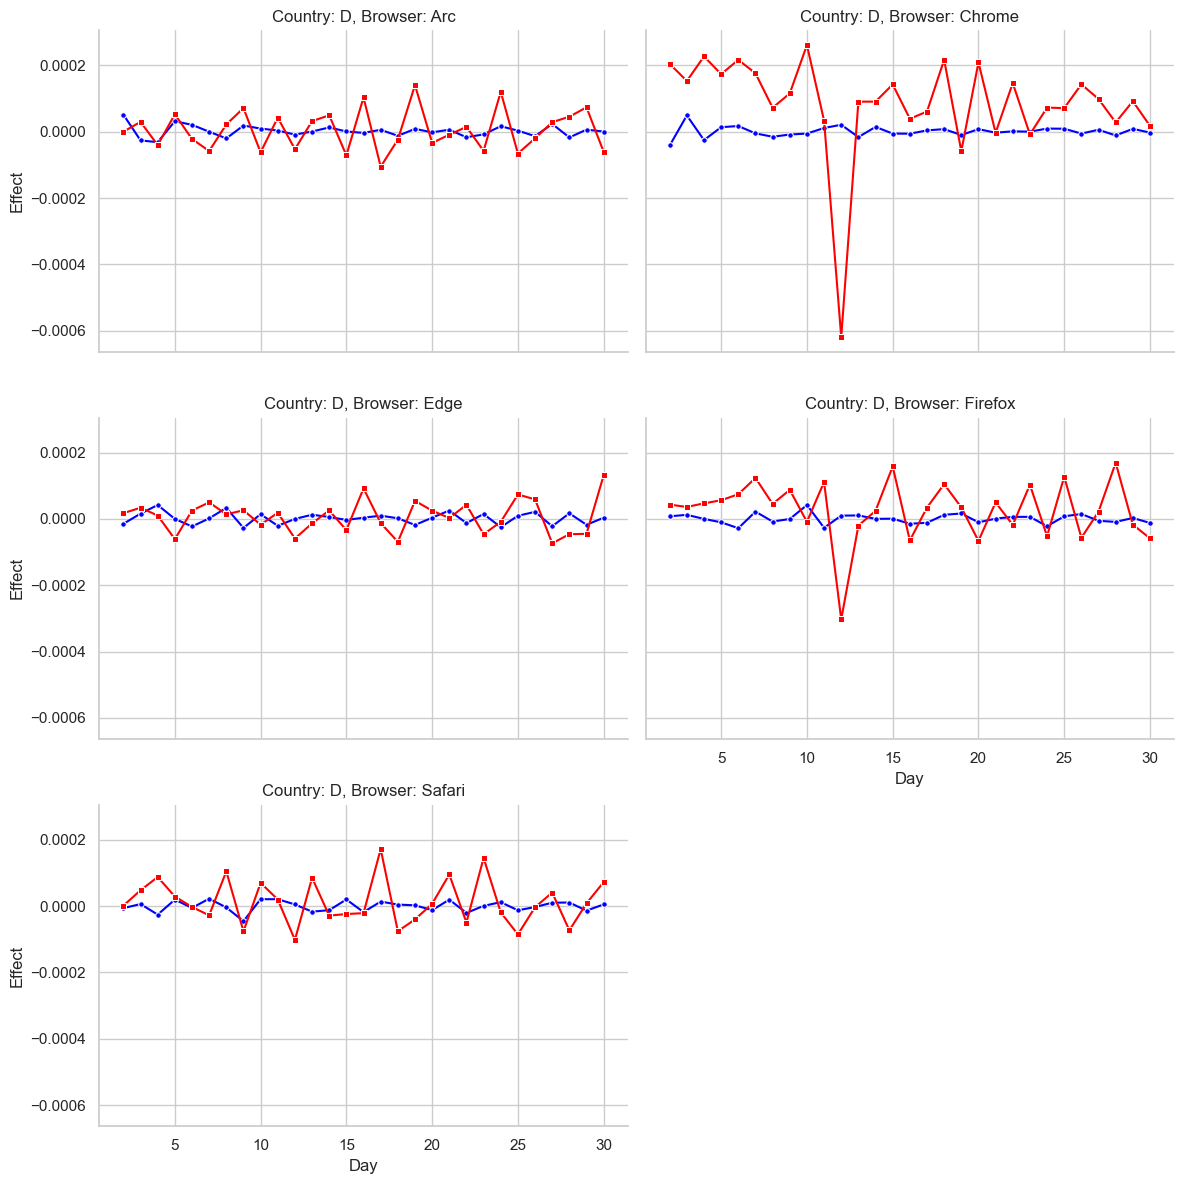

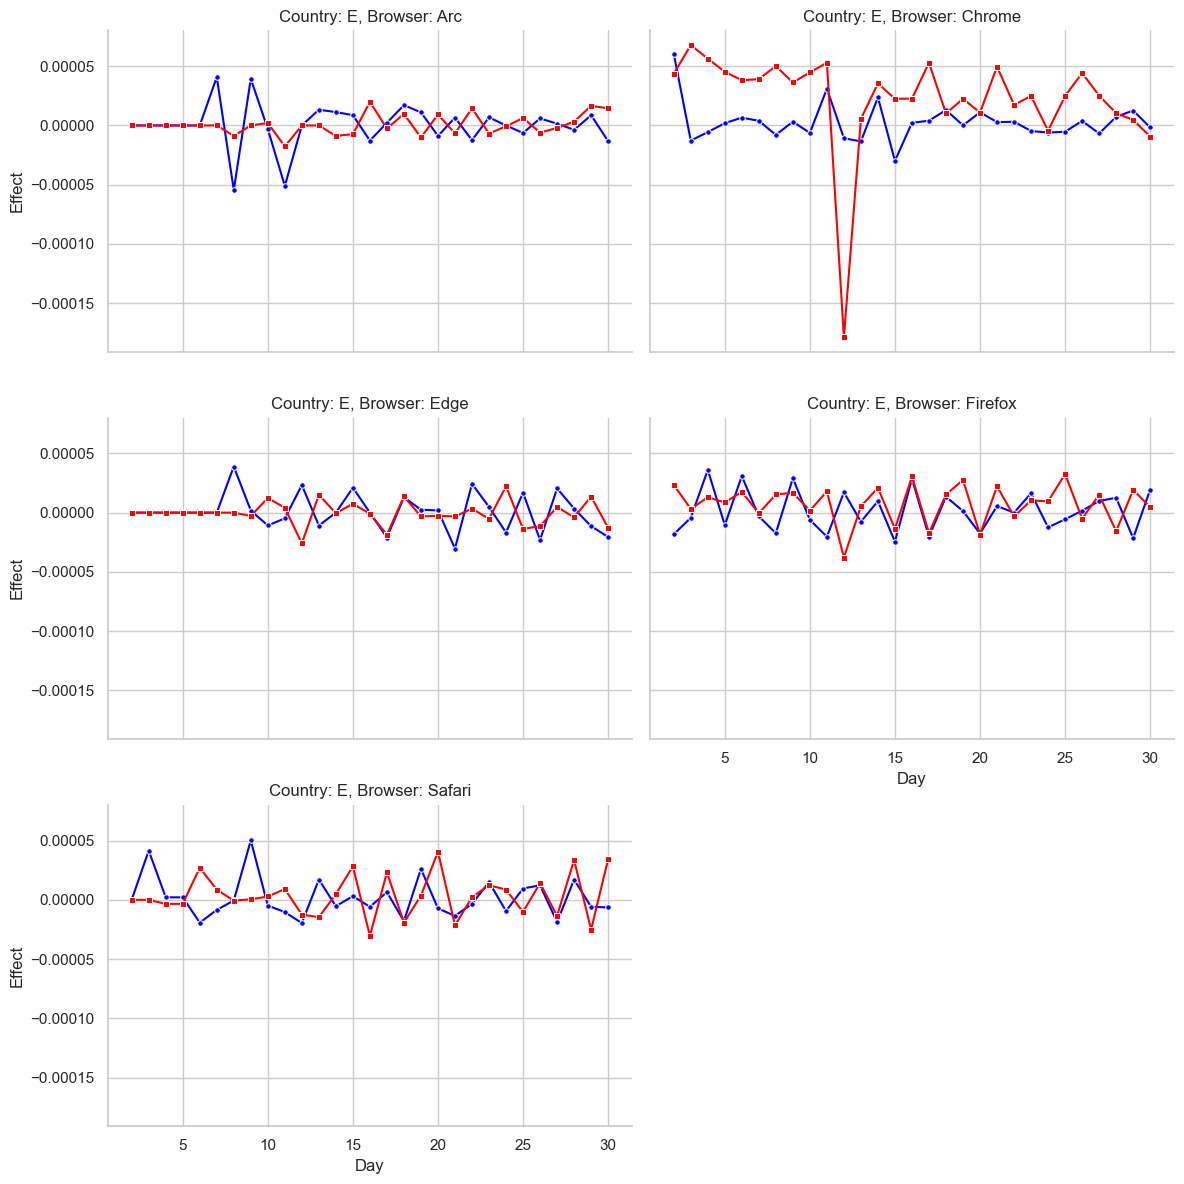

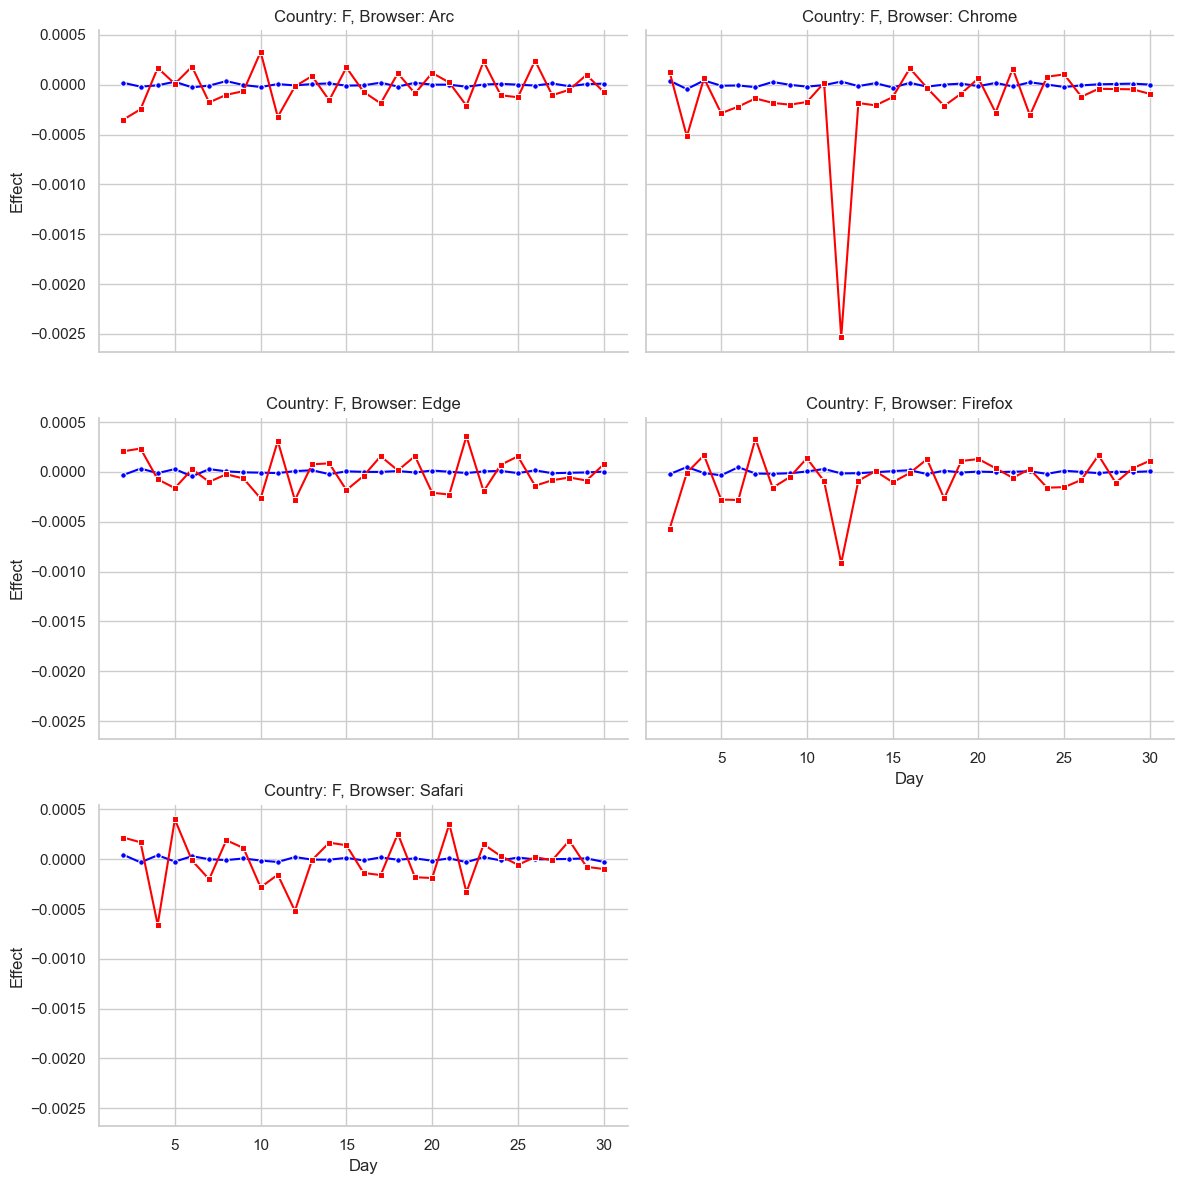

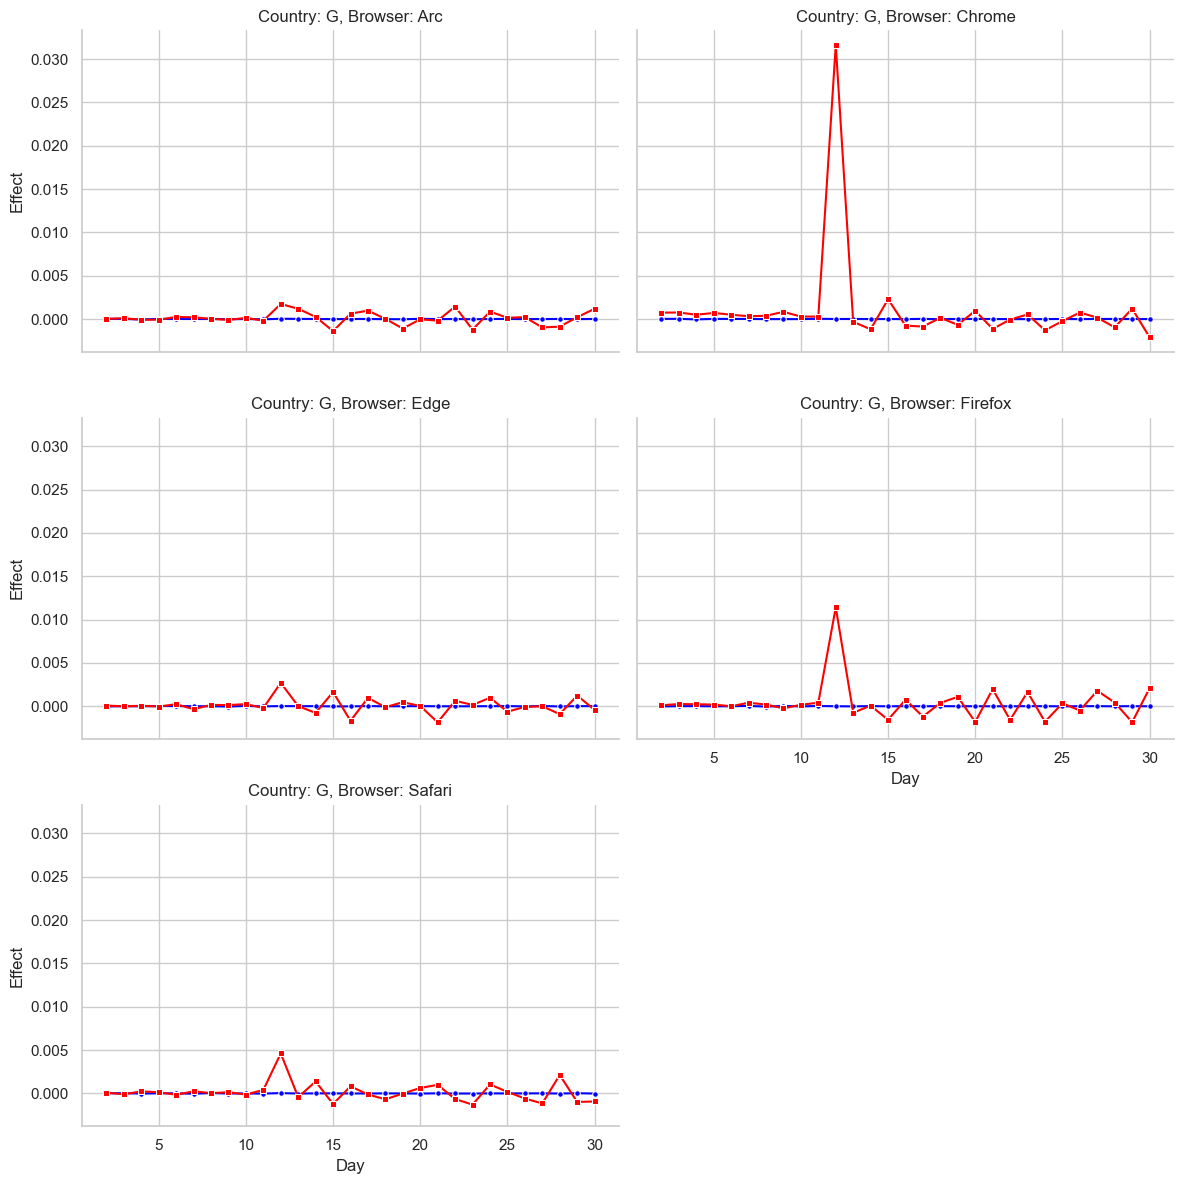

In [34]:
# Loop over all unique countries
for country in df_all['country'].unique():
    # Filter data for the specific country
    df_country = df_all[df_all['country'] == country]
    
    # Create FacetGrid for this country
    g = sns.FacetGrid(df_country, col='browser', col_wrap=2, height=4, aspect=1.5, sharey=True) 
    # adding sharey=True to have same y-axis limits
    
    # Add line plots for rate_effect and proportion_effect
    g.map_dataframe(sns.lineplot, x='day', y='rate_effect', marker='o', markersize=4, color='blue', label='Rate Effect')
    g.map_dataframe(sns.lineplot, x='day', y='proportion_effect', marker='s', markersize=4, color='red', label='Proportion Effect')
    
    # Adjust layout
    g.set_axis_labels('Day', 'Effect')
    g.set_titles('Country: ' + country + ', Browser: {col_name}')
    
    plt.tight_layout()
    plt.show()

In [35]:
df_all.to_csv("escalation_rate_decomposition_country_broswer.csv", index=False)